<a href="https://colab.research.google.com/github/Omkar-stark2024/omkar-1st/blob/main/Air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM DEFINITION: ACCORDING TO THE AIR QUALITY WE CAN DECIDE IT BELONGS TO **RECIDENTIAL OR INDUSTRIAL AREA**

THE FIRST STEP OF ML IS TO COLLECT DATA AND INSERT IT INTLO WORK SPACE

In [92]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/City_Types.csv')
display(data)

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,Type
0,2024-01-01 00:00:00+00:00,Moscow,208.0,15.9,13.2,44.0,8.6,9.4,Industrial
1,2024-01-01 01:00:00+00:00,Moscow,207.0,17.4,13.7,44.0,8.6,10.5,Industrial
2,2024-01-01 02:00:00+00:00,Moscow,217.0,19.0,15.5,43.0,10.4,12.9,Industrial
3,2024-01-01 03:00:00+00:00,Moscow,231.0,21.0,20.7,36.0,12.3,15.3,Industrial
4,2024-01-01 04:00:00+00:00,Moscow,263.0,34.5,27.2,27.0,13.6,20.0,Industrial
...,...,...,...,...,...,...,...,...,...
52699,2024-12-31 19:00:00+00:00,Stockholm,211.0,20.5,1.1,54.0,4.6,10.6,Residential
52700,2024-12-31 20:00:00+00:00,Stockholm,183.0,10.0,0.6,64.0,2.5,6.0,Residential
52701,2024-12-31 21:00:00+00:00,Stockholm,167.0,5.1,0.4,72.0,2.0,4.4,Residential
52702,2024-12-31 22:00:00+00:00,Stockholm,160.0,3.9,0.3,73.0,1.4,2.6,Residential


STEP-2 DATA ANALYSIS: now we can obser each coloum and decide what are the dependent coloums and what ar the independent coloum

In [93]:
print(data.columns)
data.info()
print(data.isnull().sum())
print(data.duplicated().sum())

Index(['Date', 'City', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'Type'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   NO2     52704 non-null  float64
 4   SO2     52704 non-null  float64
 5   O3      52704 non-null  float64
 6   PM2.5   52704 non-null  float64
 7   PM10    52704 non-null  float64
 8   Type    52704 non-null  object 
dtypes: float64(6), object(3)
memory usage: 3.6+ MB
Date     0
City     0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
Type     0
dtype: int64
0


in these step i converted data type from float to integer

In [94]:
data['CO'] =data['CO'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  int64  
 3   NO2     52704 non-null  float64
 4   SO2     52704 non-null  float64
 5   O3      52704 non-null  float64
 6   PM2.5   52704 non-null  float64
 7   PM10    52704 non-null  float64
 8   Type    52704 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.6+ MB


4th step of ml(EDA)

In [95]:
data.describe()

,CO,NO2,SO2,O3,PM2.5,PM10
count,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
mean,508.030472,29.616492,22.387250,53.423668,32.931045,50.644980
std,692.274824,23.984409,34.285823,42.225556,43.833691,67.311502
min,0.000000,0.900000,0.000000,0.000000,0.300000,0.400000
25%,187.000000,11.000000,0.700000,26.000000,6.400000,9.400000
50%,268.000000,23.300000,10.500000,48.000000,14.800000,19.800000
75%,519.000000,42.200000,30.200000,69.000000,42.600000,68.350000
max,12876.000000,218.000000,497.800000,342.000000,459.100000,661.200000


<Axes: xlabel='CO', ylabel='Count'>

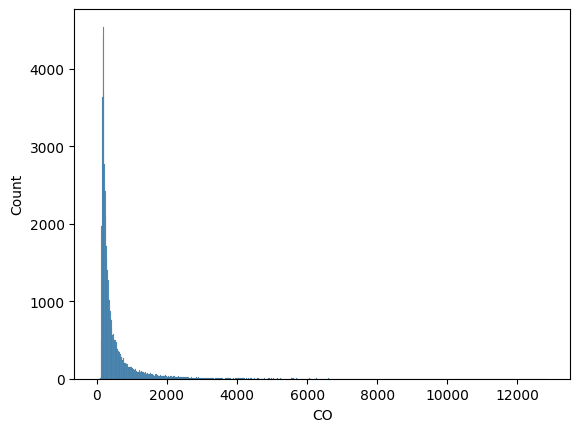

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data['CO'])

<Axes: ylabel='CO'>

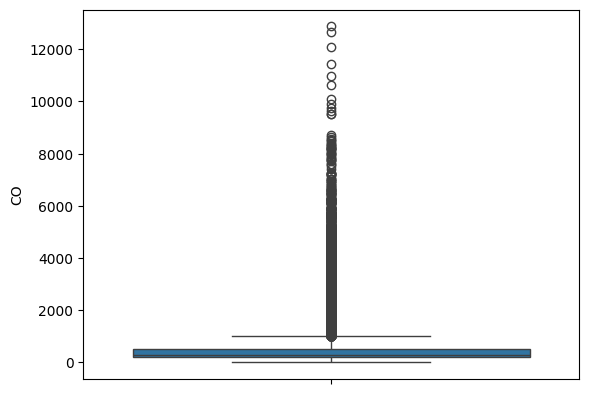

In [97]:
sns.boxplot(data['CO'])

<Axes: xlabel='CO', ylabel='SO2'>

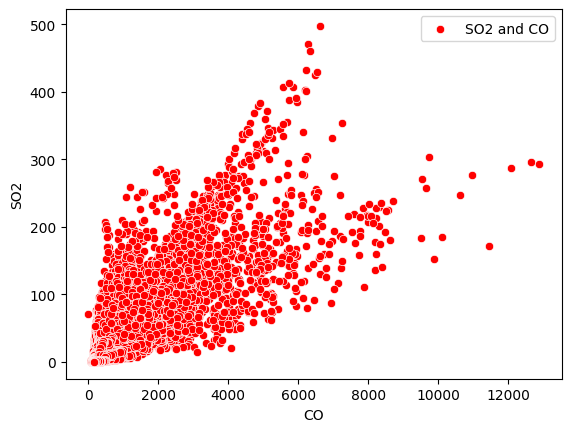

In [98]:
sns.scatterplot(x="CO",y="SO2",color='red', label= "SO2 and CO",data = data)


<Axes: >

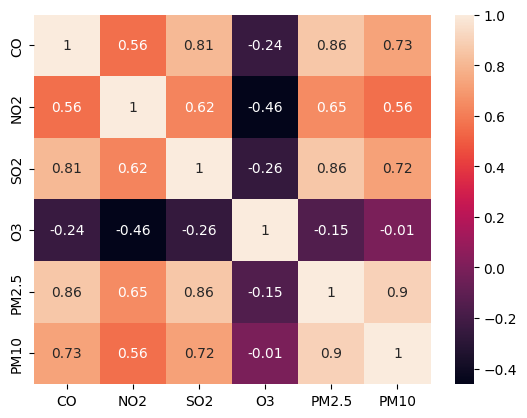

In [99]:
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True)

FEATURE ENGINEERING

In [100]:
data.columns

Index(['Date', 'City', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'Type'], dtype='object')

In [101]:
data=data.drop('Date', axis=1)


In [102]:
from sklearn.preprocessing import LabelEncoder

# Separate features and label
X = data.drop('Type', axis=1)
y = data['Type']

# Encode categorical columns in X (only 'City' is object)
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Encode y (Type column)
y = le.fit_transform(y)


In [103]:
print(X.head())
print(y[:5])
print(X.dtypes)

   City   CO   NO2   SO2    O3  PM2.5  PM10
0     2  208  15.9  13.2  44.0    8.6   9.4
1     2  207  17.4  13.7  44.0    8.6  10.5
2     2  217  19.0  15.5  43.0   10.4  12.9
3     2  231  21.0  20.7  36.0   12.3  15.3
4     2  263  34.5  27.2  27.0   13.6  20.0
[0 0 0 0 0]
City       int64
CO         int64
NO2      float64
SO2      float64
O3       float64
PM2.5    float64
PM10     float64
dtype: object


SPLITING OF DATA

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

TRAINING OF DATA WITH DESCITION CLASSIFER

In [105]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5317
           1       1.00      1.00      1.00      5224

    accuracy                           1.00     10541
   macro avg       1.00      1.00      1.00     10541
weighted avg       1.00      1.00      1.00     10541



In [107]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 1.0
Test Accuracy: 1.0


using random forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
print("Random Forest Accuracy:", rf_model.score(X_test, y_test))


Random Forest Accuracy: 1.0


testing with sample

In [109]:
sample = [[2, 250.0, 20.0, 15.0, 35.0, 10.0, 12.0]]  # Correct order of features

predicted = model.predict(sample)
print("Predicted Label:", predicted)
print("Predicted Type:", le.inverse_transform(predicted))

Predicted Label: [0]
Predicted Type: ['Industrial']


In [110]:
sample_inputs = [
    ["Moscow", 208.0, 15.9, 13.2, 44.0, 8.6, 9.4],
    ["Moscow", 231.0, 21.0, 20.7, 36.0, 12.3, 15.3],
    ["Moscow", 263.0, 34.5, 27.2, 27.0, 13.6, 20.0],
    ["Moscow", 207.0, 17.4, 13.7, 44.0, 8.6, 10.5],
    ["Moscow", 217.0, 19.0, 15.5, 43.0, 10.4, 12.9]
]

# Fit a LabelEncoder specifically for the 'City' column
city_encoder = LabelEncoder()
city_encoder.fit(data['City']) # Fit on the 'City' column of the original data

city_encoded = city_encoder.transform(["Moscow"])[0]

# Now you can proceed with creating the full sample data for prediction
# You'll need to combine the encoded city with the other numerical features
# For example, to predict on the first sample input:
# sample_for_prediction = [[city_encoded, sample_inputs[0][1], sample_inputs[0][2], sample_inputs[0][3], sample_inputs[0][4], sample_inputs[0][5], sample_inputs[0][6]]]
# predicted = model.predict(sample_for_prediction)
# print("Predicted Label:", predicted)
# print("Predicted Type:", le.inverse_transform(predicted)) # Assuming 'le' is the encoder for 'Type'

In [111]:
encoded_inputs = []
for sample in sample_inputs:
    # Use the city_encoder to transform the city name
    encoded_city = city_encoder.transform([sample[0]])[0]
    encoded = [encoded_city] + sample[1:]  # Combine encoded city with other features
    encoded_inputs.append(encoded)

# Now you can use encoded_inputs for prediction
# For example, to predict on the first sample input:
# sample_for_prediction = [encoded_inputs[0]]
# predicted = model.predict(sample_for_prediction)
# print("Predicted Label:", predicted)
# print("Predicted Type:", le.inverse_transform(predicted))

In [112]:
for i, row in enumerate(encoded_inputs):
    pred = model.predict([row])
    label = le.inverse_transform(pred)[0]
    print(f"Sample {i+1} → Predicted Type: {label}")


Sample 1 → Predicted Type: Industrial
Sample 2 → Predicted Type: Industrial
Sample 3 → Predicted Type: Industrial
Sample 4 → Predicted Type: Industrial
Sample 5 → Predicted Type: Industrial


DEPOYING

In [113]:
import joblib

# Save the model
joblib.dump(model, 'air_quality_model.pkl')

# Save the label encoder too (for decoding predictions later)
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [114]:
# Load model
model = joblib.load('air_quality_model.pkl')

# Load encoder
le = joblib.load('label_encoder.pkl')

# Predict
sample = [[2, 250.0, 20.0, 15.0, 35.0, 10.0, 12.0]]
prediction = model.predict(sample)
print("Predicted:", le.inverse_transform(prediction))


Predicted: ['Industrial']
